In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import matplotlib as mpl
mpl.rc("font", family="Malgun Gothic")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("dataset/store_member.csv")
df1.shape

(4396, 6)

In [3]:
df1.head(3) # 고객 고유정보 데이터

,회원번호,회원상태,성별,결혼유무,주소,생년
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967.00
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.00
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.00


물품을 구매한 고객 데이터
- store_member.csv

매장별 판매 데이터
- store_product_1.csv: 매장 1번
- store_product_2.csv: 매장 2번
- store_product_3.csv: 매장 3번
- store_product_4.csv: 매장 4번
- 4개 모두 columns가 같다. 
> 따라서 concat 사용한다.


위 데이터를 적절히 처리해서 분석해보자. 

In [4]:
df2 = pd.DataFrame()
for i in range(1, 5):
    dfn = pd.read_csv("dataset/store_product_" + str(i) + ".csv")
    df2 = pd.concat([df2, dfn]) # dfn을 df2 아래에 붙인다. 

In [5]:
df2.shape

(735783, 11)

In [6]:
df2.head(3)

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호
0,20170201,50301001.00,채소,과일채소,딸기,딸기(1kg),1.00,13600.00,매장1,NaN,2102.00
1,20170201,80201053.00,간식,떡,가래떡,현미가래떡(400g),1.00,99999999.00,매장1,NaN,2102.00
2,20170201,110104033.00,음료,음료,음료기타,개복숭아감식초(700ml),1.00,13000.00,매장1,NaN,2103.00


- 공급일자
> - 실무에서 **주차(workweek)** 개념 중요하다. 
- 물품대분류

공급일자

In [7]:
df2["공급일자(dt)"] = pd.to_datetime(df2["공급일자"], format="%Y%m%d")
df2["연도"] = df2["공급일자(dt)"].dt.year
df2["월"] =  df2["공급일자(dt)"].dt.month
df2["주차(workweek)"] = df2["공급일자(dt)"].dt.isocalendar().week
df2["요일"] = df2["공급일자(dt)"].dt.day_name()

In [8]:
df2.head(1)

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호,공급일자(dt),연도,월,주차(workweek),요일
0,20170201,50301001.00,채소,과일채소,딸기,딸기(1kg),1.00,13600.00,매장1,NaN,2102.00,2017-02-01,2017,2,5,Wednesday


소매점 판매 데이터
- 구매금액: 하나의 물품을 샀을 때 찍히는 금액
- 구매수량
- 반품_원거래일자: 반품한 물품의 원거래 일자

In [9]:
# 이상치 확인: df.describe()
df2.describe()

,공급일자,물품코드,구매수량,구매금액,반품_원거래일자,회원번호,연도,월,주차(workweek)
count,735783.00,735778.00,735783.00,735779.00,10337.00,735761.00,735783.00,735783.00,735783.00
mean,20170371.33,70849907.24,164.25,5826.37,20170312.35,3091.30,2017.00,3.56,13.57
std,171.53,25240499.72,117740.28,117462.25,786.00,958.02,0.00,1.71,7.49
min,20170102.00,10101018.00,-120.00,-360000.00,20161213.00,2101.00,2017.00,1.00,1.00
25%,20170217.00,50508005.00,1.00,2150.00,20170215.00,2391.00,2017.00,2.00,7.00
50%,20170403.00,60601046.00,1.00,3800.00,20170406.00,2755.00,2017.00,4.00,14.00
75%,20170519.00,90103063.00,1.00,6500.00,20170524.00,3492.00,2017.00,5.00,20.00
max,20170630.00,160101271.00,99999999.00,99999999.00,20170630.00,6496.00,2017.00,6.00,26.00


In [10]:
# 구매 금액 이상치
# cond1 = (df2["구매금액"] >= 10**5) # 10만원 이상
# 구매금액이 10만원 이상인 데이터
# 홍삼액, 한우찜갈비 이런 것은 10만원을 넘을 수 있다. 
# 현미 가래떡 금액 99999999원 이런 것을 처리해야 한다. 
#cond1 = (df2["구매금액"] >= 2*(10**5)) # 20만원 이상
cond1 = (df2["구매금액"] >= 10**6) # 100만원 이상
# 수저세트 수량이 23이므로 충분히 100만원 넘을 수 있다. 
# 가장 정확한 방법은, 각 물품의 구매 단가를 확인해서 하는 것이 가장 좋다. 
df2.loc[cond1]

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호,공급일자(dt),연도,월,주차(workweek),요일
1,20170201,80201053.00,간식,떡,가래떡,현미가래떡(400g),1.00,99999999.00,매장1,NaN,2102.00,2017-02-01,2017,2,5,Wednesday
32771,20170112,130220024.00,생활용품,생활용품,전통유기,유기 궁중수저세트(선물류),23.00,1449000.00,매장2,NaN,4267.00,2017-01-12,2017,1,2,Thursday
35074,20170115,50142001.00,채소,잎/줄기채소,시금치,시금치(300g),1.00,9899999.00,매장2,NaN,2106.00,2017-01-15,2017,1,2,Sunday


In [11]:
# 구매 금액 이상치 2건 값을 NaN으로 대체
cond1 = (df2["구매금액"] == 99999999)
df2["구매금액(clean)"] = df2["구매금액"]
df2.loc[cond1, "구매금액(clean)"] = np.nan

In [12]:
# 구매수량
#cond1 = (df2["구매수량"] >= 100) # 100개 이상
# 팽이버섯 120개 구매. 자영업자의 경우 가능하다. 
cond1 = (df2["구매수량"] >= 130) # 130개 이상
df2["구매수량(clean)"] = df2["구매수량"]
df2.loc[cond1, "구매수량(clean)"] = np.nan
# 가장 강력한 이상치 처리 방법은 
# 물품명별 고유 단가를 갖고 계산해보는 것이다. 
# pandas 프로파일링을 사용하면 이런 작업을 쉽게 할 수 있다. 

In [13]:
# 17년도만 있다 
df2.pivot_table(index=["연도"], values=["구매수량(clean)", "구매금액(clean)"],
                aggfunc="sum")

,구매금액(clean),구매수량(clean)
연도,,
2017,4186917037.00,849082.20


In [14]:
# 판매 추이
df2.pivot_table(index=["연도", "월"],
                values=['구매수량(clean)', "구매금액(clean)"],
                aggfunc="sum")

구매금액(clean)  구매수량(clean)
연도   월                          
2017 1 756411944.00    137834.73
     2 626351451.00    125945.90
     3 731169409.00    148444.85
     4 681583060.00    140345.42
     5 676168421.00    143463.00
     6 715232752.00    153048.30

In [15]:
df2['구매수량(clean)']

0        1.00
1        1.00
2        1.00
3        1.00
4        1.00
         ... 
138019   1.00
138020   1.00
138021   1.00
138022   1.00
138023   1.00
Name: 구매수량(clean), Length: 735783, dtype: float64

In [16]:
df2.head(1)

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호,공급일자(dt),연도,월,주차(workweek),요일,구매금액(clean),구매수량(clean)
0,20170201,50301001.00,채소,과일채소,딸기,딸기(1kg),1.00,13600.00,매장1,NaN,2102.00,2017-02-01,2017,2,5,Wednesday,13600.00,1.00


C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1134: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_data.insert(0, var, comp_col)


ValueError: cannot reindex on an axis with duplicate labels

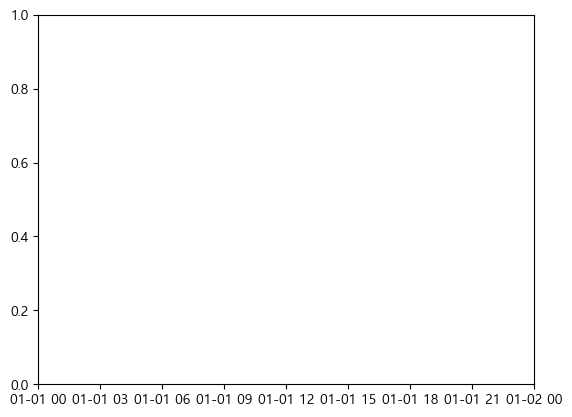

In [17]:
sns.lineplot(data=df2, x="공급일자(dt)", y="구매금액(clean)",
             estimator=sum, errorbar=None)
# 시간에 따른 판매추이, 매출의 추이
# 1월-2월 사이에 큰 peak이 있음을 확인할 수 있다. 
# peak을 특정 event 또는 이상치라고 볼 수 있다. 
# 저 날짜를 잘 확인해보면 설날이다. 
# 도메인을 활용

# 아래로 떨어지는 peak
# 주말이나 매장이 영업을 하지 않는날
# 주기를 갖고 매출이 떨어지는 것을 확인할 수 있다. 

In [ ]:
plt.figure(figsize=(10, 5)) # 그림 사이즈 조정
sns.lineplot(data=df2, x="공급일자(dt)", y="구매금액(clean)", 
             estimator="sum", errorbar=None, hue="구매매장")
plt.savefig("image1.png")# 그림 파일로 저장
# 매장별 매출액의 추이 
# 어느 매장에서 매출 추이가 높은지 낮은지 볼 수 있음
# 3번 매장의 매출 추이가 높음 

In [ ]:
# 구매수량
plt.figure(figsize=(10, 5)) # 그림 사이즈 조정
sns.lineplot(data=df2, x="공급일자(dt)", y="구매수량(clean)", 
             estimator="sum", errorbar=None, hue="구매매장")
plt.savefig("image1.png")
# 3번 매장 위치에 인구밀집도가 높다던지, 
# 3번 매장의 규모가 다른 매장에 비해 크다던지
# 등의 추론을 해볼 수 있다. 

In [ ]:
# 물품이 가장 많이 판매되는 요일은 무슨 요일인가? 
sns.barplot(data=df2, x="요일", y="구매금액(clean)", estimator="sum", errorbar=None)
# 일요일 물품 판매량이 저조하다. 
# 월요일 매출의 추이가 가장 높다. 

In [ ]:
# 월-일요일 순으로 요일을 정렬
# order: 출력 순서를 list로 정의해줄 수 있음
sns.barplot(data=df2, x="요일", y="구매금액(clean)", 
            estimator="sum", errorbar=None,
           order=["Monday", "Tuesday", "Wednesday", 
                 "Thursday", "Friday", "Saturday", "Sunday"])

In [ ]:
# 구매매장별로 요일별 판매금액 총합 계산
sns.barplot(data=df2, x="요일", y="구매금액(clean)", 
            estimator="sum", errorbar=None, hue="구매매장",
           order=["Monday", "Tuesday", "Wednesday", 
                 "Thursday", "Friday", "Saturday", "Sunday"])

## 2

In [ ]:
# 고객별 구매금액과 구매수량의 합
df2.pivot_table(index="회원번호", 
                values=["구매금액(clean)", "구매수량(clean)"],
                aggfunc="sum")

In [ ]:
# storemember.csv와 병합하기 위해서 회원번호를 reset_index()로 빼낸다. 
df2_1 = df2.pivot_table(index="회원번호", 
                values=["구매금액(clean)", "구매수량(clean)"],
                aggfunc="sum").reset_index()

In [ ]:
# 두 df에 모두 있는 회원번호 기준으로 merge
# 구매금액(clean): 한명의 회원이 총 얼마를 구매했다. 
# 구매수량(clean): 한명의 회원이 총 몇개를 구매했다. 
df1_total = pd.merge(df1, df2_1, on="회원번호", how="inner")

In [ ]:
# 방문횟수 추가: 한명의 고객이 매장에 방문한 횟수
# 한명의 고객이 한번 방문했을 때, 서로 다른 물품을 두개 구매하면
# 같은 날짜에 물품이 두개 찍힌다. 행이 두개이다.
df2

In [ ]:
# 2101 회원이 17년도 1월 2일에 왔다. 
# 1월 3일에도 왔다는 식의 방문로그가 찍힌다. 
df2.pivot_table(index=["회원번호", "공급일자(dt)"], values="구매수량", 
                aggfunc="sum")

In [ ]:
df2_2 = df2.pivot_table(index=["회원번호", "공급일자(dt)"], 
                values="구매수량", aggfunc="sum").reset_index()
df2_2['총방문횟수'] = 1

In [ ]:
df2_2 
# df2_2['총방문회수'] = 1
# 가 일자별로 1씩 찍힌다. 
# 이것을 활용해서 총 방문횟수를 구한다.

In [ ]:
# df2_2['총방문회수'] = 1 하고 pivot 한번 더해서 방문회수의 합을 구한다. 
# 천천히 로직을 따라와라. 그러면 이해가 된다.
# 총방문횟수: 한명의 회원이 6개월 동안 우리 매장에 총 몇번 방문했는지
# 많이 방문한 고객, 적게 방문한 고객을 구할 수도 있다. 
df2_2.pivot_table(index="회원번호", values="총방문횟수", aggfunc="sum")

In [ ]:
df2_3 = df2_2.pivot_table(index="회원번호", values="총방문횟수", 
                  aggfunc="sum").reset_index()

In [ ]:
# 회원별 구매금액의 총합, 구매수량의 총합, 방문횟수의 총합 
df1_total_1 = pd.merge(df1_total, df2_3, on="회원번호",  how="inner")

In [ ]:
df1_total_1

In [ ]:
# 한명의 고객이 매장에서 물품을 사갈 때,
# 채소를 몇%사고, 축산물은 몇 % 사고, ... 사는지
# 계산하면 구매수량의 비율을 계산할 수 있다.
df2["물품대분류"].value_counts()

In [ ]:
df2.pivot_table(index="회원번호", columns="물품대분류",
                values="구매수량(clean)", aggfunc="sum")
# 한명의 고객이 간식물품을 몇개 구매, 
# 건강물품을 몇개 구매했는지 나온다. 
# NaN : ~물품은 구매한 적이 없다.

In [ ]:
# NaN을 0으로 채워넣자: df.pivot_table(fill_value)
df2.pivot_table(index="회원번호", columns="물품대분류", values="구매수량(clean)",
               aggfunc="sum", fill_value=0)

# 각각의 항목별로 나눠서 항목별 비율을 계산해줄 수 있다. 

In [ ]:
# 각각의 고객에 대해서 몇% 간식 구매했는지 
df2.pivot_table(index="회원번호", columns="물품대분류", values="구매수량(clean)",
               aggfunc="sum", fill_value=0, margins=True)

# All : 고객별 구매수량의 합과 같음

In [ ]:
# 간식 / All, 건강 / All, ... 하면 비율이 계산된다. 
# 2101 회원이 총 381개의 물품을 구매했고,
# 간식 30개 샀는데, 이 30을 381로 나누면
# 이 고객이 구매한 전체 물품 중에 간식이 차지하는 비율이 산출된다. 
df2_4 = df2.pivot_table(index="회원번호", columns="물품대분류", values="구매수량(clean)",
               aggfunc="sum", fill_value=0, margins=True).reset_index()

In [ ]:
# 전체 회원에 대해서, 회원별 품목 구매 비율 : 주요 품목만 계산해보자. 
# df2['물품대분류'].value_counts() 에서 수가 큰 품목만 계산해보자. 
# 채소부터 주류까지만 해보자. 
df2_4['간식(%)'] = df2_4['간식'] / df2_4['All']
df2_4['건강(%)'] = df2_4['건강'] / df2_4['All']
df2_4['과실(%)'] = df2_4['과실'] / df2_4['All']
df2_4['생활용품	(%)'] = df2_4['생활용품'] / df2_4['All']
df2_4['서류(%)'] = df2_4['서류'] / df2_4['All']
df2_4['수산(%)'] = df2_4['수산'] / df2_4['All']
df2_4['양념/가루(%)'] = df2_4['양념/가루'] / df2_4['All']
df2_4['음료(%)'] = df2_4['음료'] / df2_4['All']
df2_4['잡곡(%)'] = df2_4['잡곡'] / df2_4['All']
df2_4['주곡(%)'] = df2_4['주곡'] / df2_4['All']
df2_4['주류(%)'] = df2_4['주류'] / df2_4['All']
df2_4['채소(%)'] = df2_4['채소'] / df2_4['All']
df2_4['축산물(%)'] = df2_4['축산물'] / df2_4['All']
# 이 고객이 간식을 몇% 구매하고, 
# ~으  몇 % 구매했는지 

In [ ]:
df2_4

In [ ]:
# 일일이 타이핑할 필요 없이, 
# 아래에서 필요한 data(위에서 계산한 비율 + 병합에 필요한 '회원번호')만 뽑아보자. 
df2_4.columns

In [ ]:
df2_5 = df2_4[['회원번호', '간식(%)', '건강(%)',
       '과실(%)', '생활용품\t(%)', '서류(%)', '수산(%)', '양념/가루(%)', '음료(%)', '잡곡(%)',
       '주곡(%)', '주류(%)', '채소(%)', '축산물(%)']]

In [ ]:
pd.merge(df1_total_1, df2_5, on="회원번호", how="inner")

```python
ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat
```

위 에러는 다음과 같은 이유로 발생했다: 

In [ ]:
df2_5["회원번호"] # 4285 행에 All이 있으므로 dtype이 object이다. 
# margins 때문에 All이 들어갔다. 

In [ ]:
df1_total_1["회원번호"] # dtype이 int64이다. 
# dtype이 달라서 에러가 발생했다. 

In [ ]:
# 해결방안: All 빼고, int64로 변환시킨 뒤에 merge를 해보자. 

In [ ]:
df2_5["회원번호"].iloc[:-1] # All만 빼기. 

In [ ]:
df2_5["회원번호"].iloc[:-1].astype(int) # All 뺀 ser의 dtype을 int로 변환

In [ ]:
df2_5["회원번호"] = df2_5["회원번호"].iloc[:-1].astype(int)

In [ ]:
# 물품 대분류별 구매비율까지. 
df_total = pd.merge(df1_total_1, df2_5, on="회원번호", how="inner")

In [ ]:
df_total

In [ ]:
# 추가 파생변수 생성: 총 구매금액을 방문횟수로 나눠주면, 
# 1회 방문 당 평균 구매금액을 계산할 수 있다. 
df_total["1회방문시평균구매금액"] = df_total["구매금액(clean)"] / df_total["총방문횟수"]

In [ ]:
# 1회방문시평균구매금액: 고객이 1회 방문했을 때 
df_total.head()

In [ ]:
# 다양한 파생변수를 만들 때 이 데이터를 다시 사용할거다. 
# pivoting
# pandas profiling: 데이터에 대한 전반적인 요약

Mission
1. 처리한 데이터를 바탕으로, '공급일자(dt)'에 따른 '구매금액(clean)'의 합을 sns.lineplot( ) 함수를 활용하여, '물품대분류' 별 로 판매 추이를 확인하는 그래프를 그려보세요!

2. 병합 된 df_total 데이터를 이용하여, '성별'에 따른 '총방문횟수'의 평균을 sns.barplot( ) 함수를 활용하여, 시각화 해보세요!

3. df_total 데이터에서 '회원상태'에 따라 '총방문횟수'의 유의미한 차이가 있는지 확인해 보기위해, '회원상태'에 따른 '총방문횟수'의 평균을 pivot_table 함수를 이용해 계산해 보세요!